# Monitoring Energy Consumption Trends for Homeowners

## Project Summary
This project aims to help homeowners monitor their energy consumption trends over time and predict future
energy usage accurately using exploratory data analysis, energy consumption trend analysis, and regression
model selection. The dataset used for the project was obtained from a published paper[1], and after conducting
exploratory analysis, the Appliances feature exhibited the highest correlation with the lights feature. Moreover,
the energy consumption trend analysis revealed that energy consumption patterns vary considerably, with the
highest energy consumption observed during the evenings and the middle of each month. After constructing
three distinct linear regression models using varying sets of features, it was observed that the fundamental
linear regression model exhibited superior performance. Overall, this project provides a valuable tool for
homeowners to optimize their energy usage, save money, and predict future energy consumption.



## Why Monitoring Energy Consumption Trends is Important for Homeowners 
Real-time electric energy information has a significant impact on consumer behavior and habits[2]. Previous
studies have demonstrated that providing detailed and instantaneous feedback on household electrical demand
can lead to a reduction of 5-15% in electric energy consumption[2]. However, monitoring energy consumption
over time can provide homeowners with even greater benefits. By tracking their energy usage patterns over
time, homeowners can identify changes in their consumption, such as due to a new appliance, a change in
living habits, or weather changes. This allows homeowners to take steps to adjust their energy usage and
reduce their energy bills. Additionally, monitoring energy consumption trends allows homeowners to set goals
for reducing their energy usage and track their progress toward these goals, which can help to motivate them to
make further changes to their energy usage habits and reduce their environmental impact. By comparing their
energy usage trends to those of similar homes in their area, homeowners can identify opportunities to make
changes to their habits or appliances to reduce their energy usage. Moreover, monitoring energy consumption
trends over time can help homeowners to predict their future energy costs accurately and budget accordingly,
while also evaluating the effectiveness of any changes they make to their energy usage habits or appliances.
Overall, monitoring energy consumption trends over time is a valuable tool for homeowners to optimize their
energy usage and save money while reducing their environmental impact.

## Objective
The objective of this project is to provide homeowners with the ability to monitor their energy consumption
trends over time and accurately predict their future energy usage.
## Methods
For this project, three main techniques used were; exploratory data analysis, energy consumption trend
analysis, and regression model selection.

## References
1. Luis C, Véronique F, Dominique D, “Data-driven prediction models of energy use of appliances in a
low-energy house,” Elsevier, 2017
2. João J, João P, Mário N, “Home Electric Energy Monitoring System: Design and Prototyping,”
Research Gate, 2011.


## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

## Data Loading

## Description of the dataset: 
The energy consumption dataset is a Multivariate timeseries data. It has 19,
735 instances and 29 attributes. Other characteristics: Attributes are real valued; no missing
values; data collected at 10 mins intervals over 4.5 months. Dataset is based on temperature
and humidity sensors monitored by a ZigBee wireless sensor network. The sensor data are
averaged every 10 mins. The dataset also contains energy use data (in Wh) from energy meters
logged every 10 mins. The dataset also includes weather data extracted from the nearby airport
weather station. Weather data is merged with the other energy, temperature, and humidity
data using date and time column.

In [55]:
# Loading the data
energy_data = pd.read_csv('energydata_complete.csv')
data_variables = pd.read_csv('data_variables.csv')

In [3]:
energy_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [4]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [56]:
data_variables

Data Variable  \
0                       Appliances energy consumption   
1                            Light energy consumption   
2                     T1, Temperature in kitchen area   
3                       RH1, Humidity in kitchen area   
4                 T2, Temperature in living room area   
5                   RH2, Humidity in living room area   
6                T3, Temperature in laundry room area   
7                  RH3, Humidity in laundry room area   
8                      T4, Temperature in office room   
9                        RH4, Humidity in office room   
10                        T5, Temperature in bathroom   
11                          RH5, Humidity in bathroom   
12  T6, Temperature outside the building (north side)   
13    RH6, Humidity outside the building (north side)   
14                    T7, Temperature in ironing room   
15                      RH7, Humidity in ironing room   
16                 T8, Temperature in teenager room 2   
17                   RH8, Humidity in teenager room 2   
18                    T9, Temperature in parents room   
19                      RH9, Humidity in parents room   
20  To, Temperature outside (from Chièvres weather...   
21           Pressure (from Chièvres weather station)   
22  RHo, Humidity outside (from Chièvres weather s...   
23          Windspeed (from Chièvres weather station)   
24         Visibility (from Chièvres weather station)   
25          Tdewpoint (from Chièvres weather station)   
26                           Random Variable 1 (RV_1)   
27                           Random Variable 2 (RV_2)   
28              Number of seconds from midnight (NSM)   
29         Week status (weekend (0) or a weekday (1))   
30              Day of week (Monday, Tuesday… Sunday)   
31                                    Date time stamp   

                        Units  
0                          Wh  
1                          Wh  
2                          °C  
3                           %  
4                          °C  
5                           %  
6                          °C  
7                           %  
8                          °C  
9                           %  
10                         °C  
11                          %  
12                         °C  
13                          %  
14                         °C  
15                          %  
16                         °C  
17                          %  
18                         °C  
19                          %  
20                         °C  
21                      mm Hg  
22                          %  
23                        m/s  
24                         km  
25                         °C  
26            Non dimensional  
27            Non dimensional  
28                          s  
29         Factor/categorical  
30         Factor/categorical  
31  year-month-day hour:min:s

This table offers an explanation of all the different data variables.

## Data Preprocessing

In [5]:
energy_data['date'] = energy_data['date'].astype('datetime64[ns]')

In [6]:
energy_data['lights'] = energy_data['lights'].astype('float')
energy_data['Appliances'] = energy_data['Appliances'].astype('float')

In [7]:
energy_data['Appliances'].unique()

array([  60.,   50.,   70.,  230.,  580.,  430.,  250.,  100.,   90.,
         80.,  140.,  120.,  190.,  110.,  400.,  390.,  240.,   40.,
         30.,  310.,  380.,  370.,   20.,  260.,  500.,  450.,  220.,
        170.,  290.,  130.,  200.,  210.,  180.,  350.,  300.,  340.,
        150.,  330.,  420.,  520.,  360.,  270.,  550.,  690.,  620.,
        610.,  490.,  410.,  320.,  740.,  910.,  510.,  790.,  460.,
        160.,  480.,  280.,  560., 1080.,  750.,  470.,  440.,  800.,
        540.,  530.,  660.,  630.,  600.,   10.,  570.,  830., 1070.,
        890.,  590.,  850.,  710.,  680.,  670.,  780.,  640.,  650.,
        700.,  770.,  720.,  760.,  860.,  880.,  730.,  900.,  820.,
        870.,  840.])

In [8]:
energy_data['lights'].unique()

array([30., 40., 50., 70., 60., 10., 20.,  0.])

## Exploratory Data Analysis

The dataset used for this project was obtained from a published paper [1]. After obtaining the dataset, I
conducted an exploratory analysis that involved both univariate and bivariate analyses. The univariate analysis
focused on six features, namely, Appliances, lights, T1, RH_1, Press_mm_hg, and date. I analyzed each feature
separately to identify its distribution and measure its variability. The bivariate analysis was conducted to
investigate the relationship between energy consumption (Appliances) and environmental variables such as
room temperature (T1) and room humidity (RH_1).

In [9]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

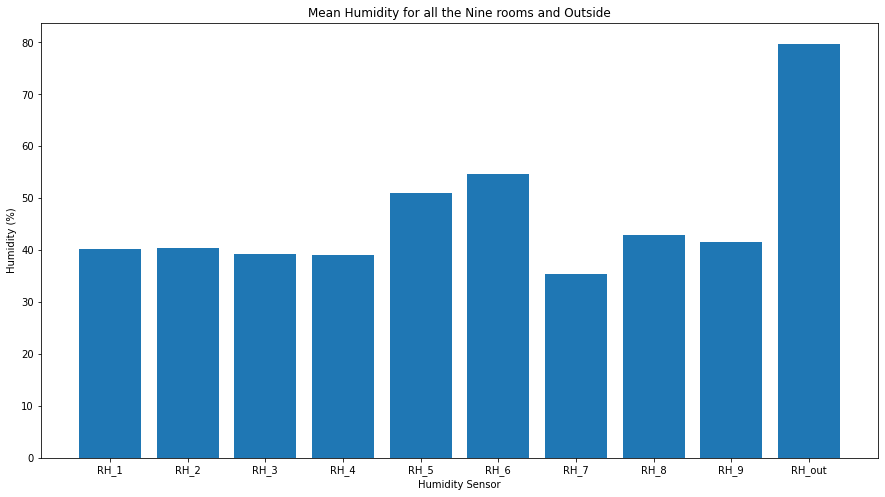

In [10]:
rh_df = energy_data[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out']]
plt.figure(figsize=(15, 8)) 

# create bar graph
plt.bar(rh_df.columns, rh_df.mean())

# set the title and axis labels
plt.title('Mean Humidity for all the Nine rooms and Outside')
plt.xlabel('Humidity Sensor')
plt.ylabel('Humidity (%)')

# show the bar graph
plt.show()


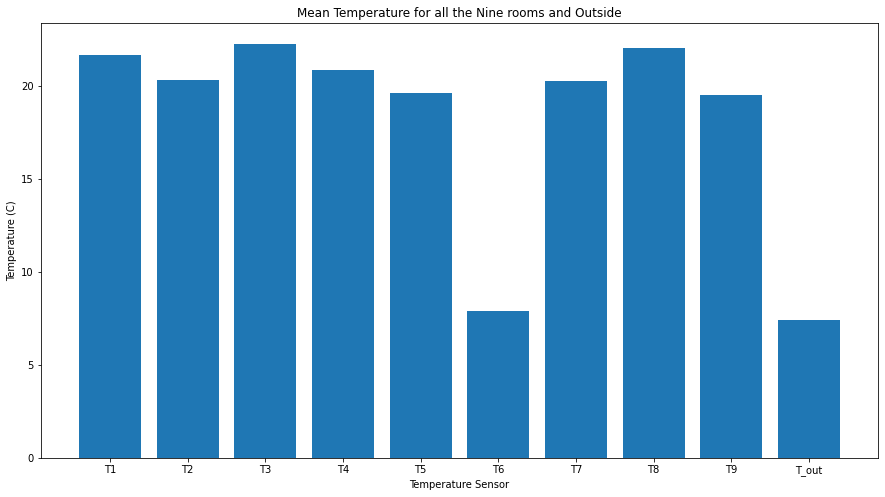

In [11]:
t_df = energy_data[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']]
plt.figure(figsize=(15, 8)) 

# create bar graph
plt.bar(t_df.columns, t_df.mean())

# set the title and axis labels
plt.title('Mean Temperature for all the Nine rooms and Outside')
plt.xlabel('Temperature Sensor')
plt.ylabel('Temperature (C)')

# show the bar graph
plt.show()


## Univariate Analysis

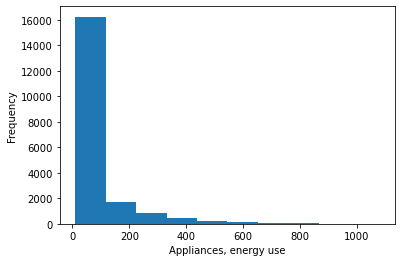

In [12]:
plt.hist(energy_data['Appliances'], bins=10)
plt.xlabel('Appliances, energy use')
plt.ylabel('Frequency')
plt.show()

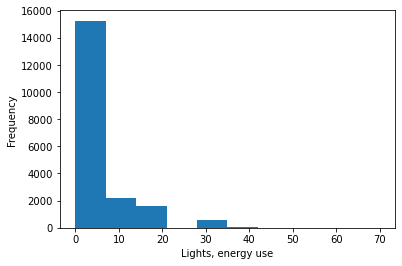

In [13]:
plt.hist(energy_data['lights'], bins=10)
plt.xlabel('Lights, energy use')
plt.ylabel('Frequency')
plt.show()

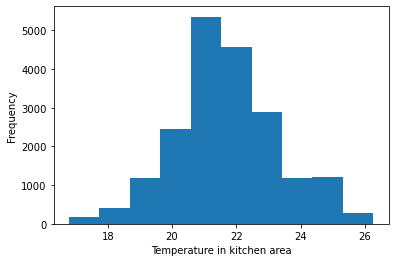

In [14]:
plt.hist(energy_data['T1'], bins=10)
plt.xlabel('Temperature in kitchen area')
plt.ylabel('Frequency')
plt.show()

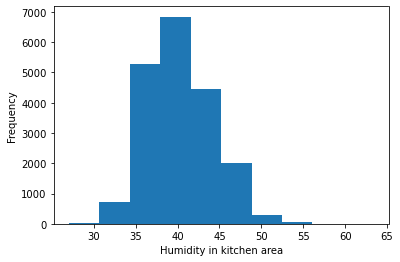

In [15]:
plt.hist(energy_data['RH_1'], bins=10)
plt.xlabel('Humidity in kitchen area')
plt.ylabel('Frequency')
plt.show()

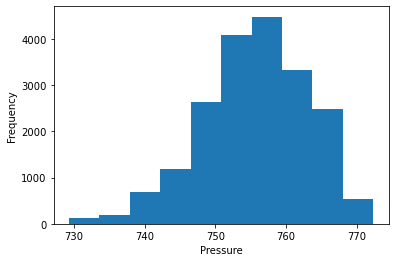

In [16]:
plt.hist(energy_data['Press_mm_hg'], bins=10)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

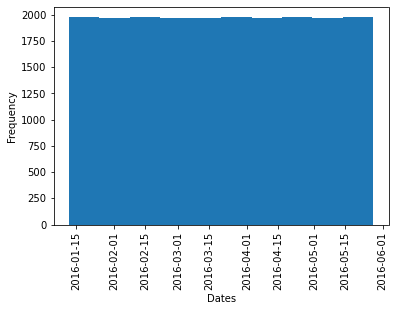

In [17]:
plt.hist(energy_data['date'], bins=10)
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [18]:
energy_data['date'].describe(datetime_is_numeric=True)

count                  19735
mean     2016-03-20 05:30:00
min      2016-01-11 17:00:00
25%      2016-02-14 23:15:00
50%      2016-03-20 05:30:00
75%      2016-04-23 11:45:00
max      2016-05-27 18:00:00
Name: date, dtype: object

## Energy Consumption Trend Analysis

### Work done
To perform an energy consumption trend analysis, I created a new data frame that contained only the date and
Appliances features. The date feature had a start date of 11th January 2016 and the end date of 27th May 2016.
From the date feature, which was in timestamp format, I extracted five columns: hour, day, date, week, and
month. These columns were then added to the new data frame to enable a more granular analysis of energy
consumption patterns. I created various plots to analyze the energy consumption trends over different periods,
including hourly, daily, weekly, monthly, and yearly intervals. Furthermore, to provide users with an interactive
way of visualizing the data, I created a time series plot that allowed them to highlight a specific week, two
weeks, or month. These visualizations help the users to identify any patterns or anomalies in the data, such as
seasonal trends or irregular spikes in energy consumption.

### Results
The plot "Time Series Average Energy Consumption by Hour" shows that energy consumption is at its peak during the evenings, while "Time Series Average Energy Consumption by Day" plot indicates that consumption tends to increase in the middle and towards the end of each month. In addition, "Time Series Average Energy Consumption by Month" plot highlights a general reduction in energy consumption from month to month, with the lowest values observed in May.


In [19]:
date_dataset = energy_data[['date','Appliances']]
date_dataset

date  Appliances
0     2016-01-11 17:00:00        60.0
1     2016-01-11 17:10:00        60.0
2     2016-01-11 17:20:00        50.0
3     2016-01-11 17:30:00        50.0
4     2016-01-11 17:40:00        60.0
...                   ...         ...
19730 2016-05-27 17:20:00       100.0
19731 2016-05-27 17:30:00        90.0
19732 2016-05-27 17:40:00       270.0
19733 2016-05-27 17:50:00       420.0
19734 2016-05-27 18:00:00       430.0

[19735 rows x 2 columns]

In [20]:
# break down the data into hours, days, dates, weeks and months and add them to the date_dataset
date_dataset['date2'] = date_dataset['date'].dt.date
date_dataset['hour'] = date_dataset['date'].dt.hour
date_dataset['day'] = date_dataset['date'].dt.day
date_dataset['week'] = date_dataset['date'].dt.week
date_dataset['month'] = date_dataset['date'].dt.month

In [21]:
# rename the columns 
date_dataset = date_dataset.rename(columns={'date': 'timestamp', 'date2': 'date'})
date_dataset

timestamp  Appliances        date  hour  day  week  month
0     2016-01-11 17:00:00        60.0  2016-01-11    17   11     2      1
1     2016-01-11 17:10:00        60.0  2016-01-11    17   11     2      1
2     2016-01-11 17:20:00        50.0  2016-01-11    17   11     2      1
3     2016-01-11 17:30:00        50.0  2016-01-11    17   11     2      1
4     2016-01-11 17:40:00        60.0  2016-01-11    17   11     2      1
...                   ...         ...         ...   ...  ...   ...    ...
19730 2016-05-27 17:20:00       100.0  2016-05-27    17   27    21      5
19731 2016-05-27 17:30:00        90.0  2016-05-27    17   27    21      5
19732 2016-05-27 17:40:00       270.0  2016-05-27    17   27    21      5
19733 2016-05-27 17:50:00       420.0  2016-05-27    17   27    21      5
19734 2016-05-27 18:00:00       430.0  2016-05-27    18   27    21      5

[19735 rows x 7 columns]

In [22]:
# group by hour, dates, days, weeks and months
weeks = date_dataset.groupby(['week']).agg({'Appliances': ['mean']})
months = date_dataset.groupby(['month']).agg({'Appliances': ['mean']})
days = date_dataset.groupby(['day']).agg({'Appliances': ['mean']})
dates = date_dataset.groupby(['date']).agg({'Appliances': ['mean']})
hours = date_dataset.groupby(['hour']).agg({'Appliances': ['mean']})

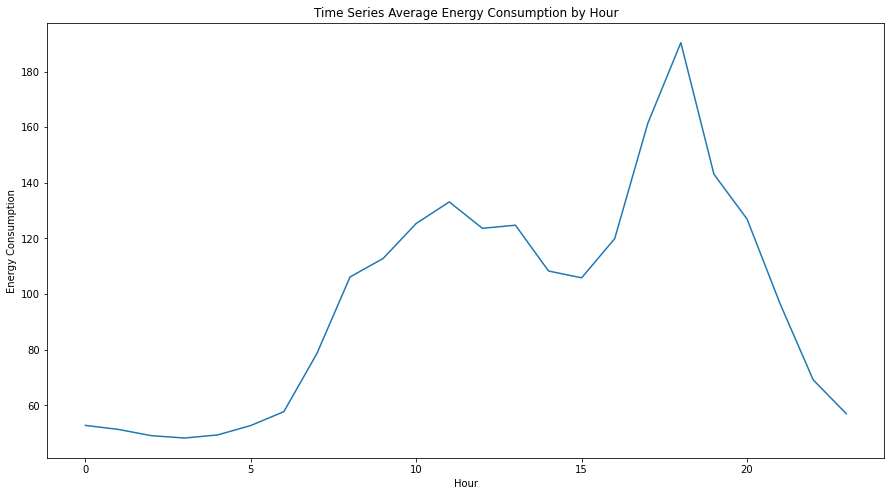

In [23]:
plt.figure(figsize=(15, 8)) 
plt.title('Time Series Average Energy Consumption by Hour')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.plot(hours.index,hours[('Appliances', 'mean')])

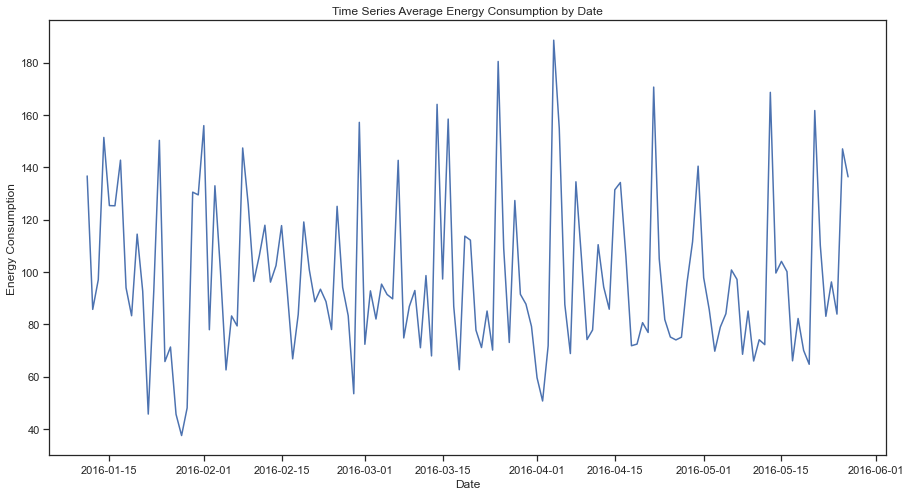

In [53]:
plt.figure(figsize=(15, 8)) 
plt.title('Time Series Average Energy Consumption by Date')
plt.ylabel('Energy Consumption')
plt.xlabel('Date')
plt.plot(dates.index,dates[('Appliances', 'mean')])

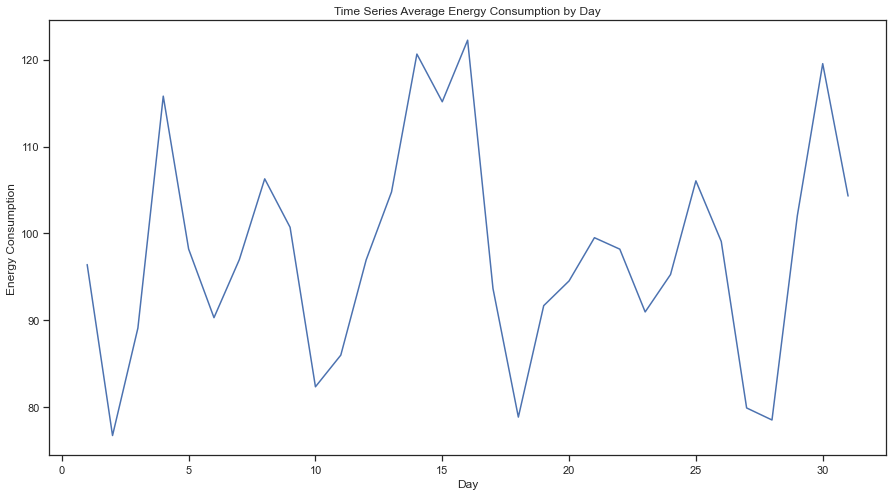

In [54]:
plt.figure(figsize=(15, 8)) 
plt.title('Time Series Average Energy Consumption by Day')
plt.ylabel('Energy Consumption')
plt.xlabel('Day')
plt.plot(days.index,days[('Appliances', 'mean')])

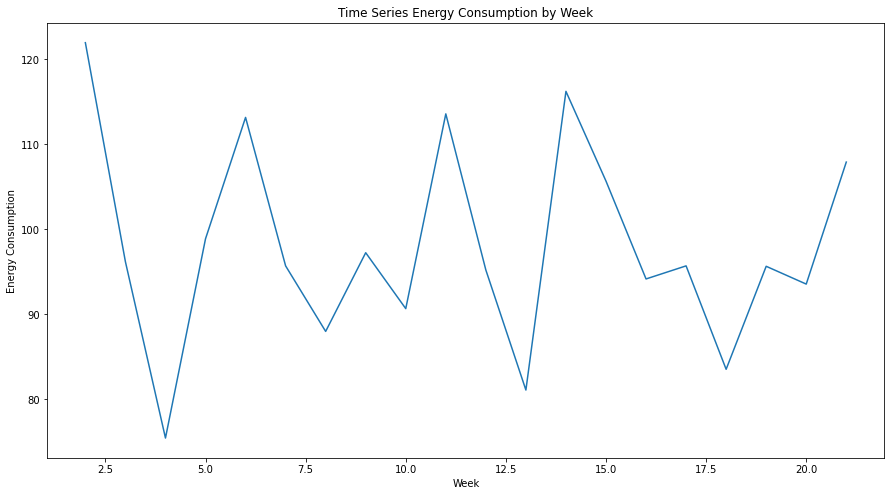

In [26]:
plt.figure(figsize=(15, 8))
plt.title('Time Series Average Energy Consumption by Week')
plt.ylabel('Energy Consumption')
plt.xlabel('Week')
plt.plot(weeks.index,weeks[('Appliances', 'mean')])

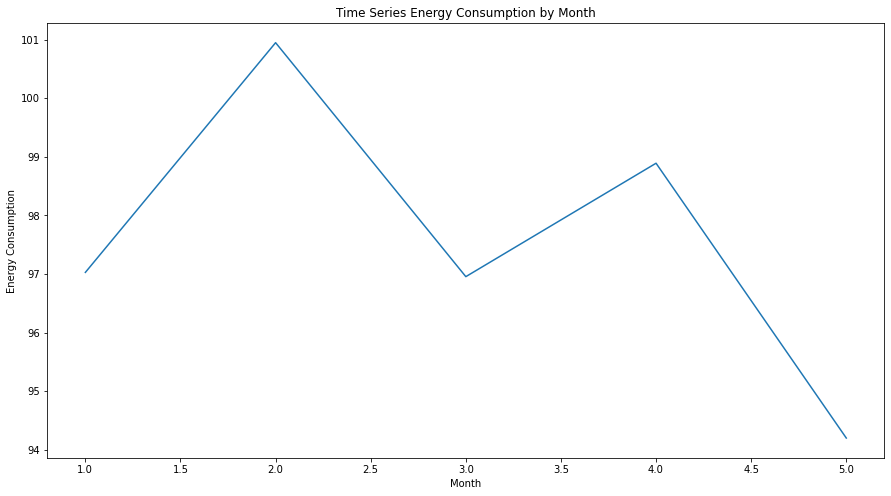

In [27]:
plt.figure(figsize=(15, 8)) 
plt.title('Time Series Average Energy Consumption by Month')
plt.ylabel('Energy Consumption')
plt.xlabel('Month')
plt.plot(months.index,months[('Appliances', 'mean')])

In [28]:
date_dataset

timestamp  Appliances        date  hour  day  week  month
0     2016-01-11 17:00:00        60.0  2016-01-11    17   11     2      1
1     2016-01-11 17:10:00        60.0  2016-01-11    17   11     2      1
2     2016-01-11 17:20:00        50.0  2016-01-11    17   11     2      1
3     2016-01-11 17:30:00        50.0  2016-01-11    17   11     2      1
4     2016-01-11 17:40:00        60.0  2016-01-11    17   11     2      1
...                   ...         ...         ...   ...  ...   ...    ...
19730 2016-05-27 17:20:00       100.0  2016-05-27    17   27    21      5
19731 2016-05-27 17:30:00        90.0  2016-05-27    17   27    21      5
19732 2016-05-27 17:40:00       270.0  2016-05-27    17   27    21      5
19733 2016-05-27 17:50:00       420.0  2016-05-27    17   27    21      5
19734 2016-05-27 18:00:00       430.0  2016-05-27    18   27    21      5

[19735 rows x 7 columns]

## Interactive Plot

In [29]:
import plotly.express as px
import pandas as pd

# create an interactive line plot
fig = px.line(date_dataset, x='timestamp', y='Appliances')

# add range slider to highlight specific periods
fig.update_layout(xaxis=dict(
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1 week", step="day", stepmode="backward"),
            dict(count=14, label="2 weeks", step="day", stepmode="backward"),
            dict(count=30, label="1 month", step="day", stepmode="backward"),
            dict(count=60, label="2 months", step="day", stepmode="backward"),
            dict(count=90, label="3 months", step="day", stepmode="backward"),
            dict(step="all")
        ])
    ),
    
    rangeslider=dict(
        visible=True
    ),
    type="date"
    
))

fig.update_layout(
    title={
        'text': " Interactive Plot of Appliances Energy Consumption Over Time ",
        'y':0.99,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)



# show the interactive plot
fig.show()


## Bivariate Analysis

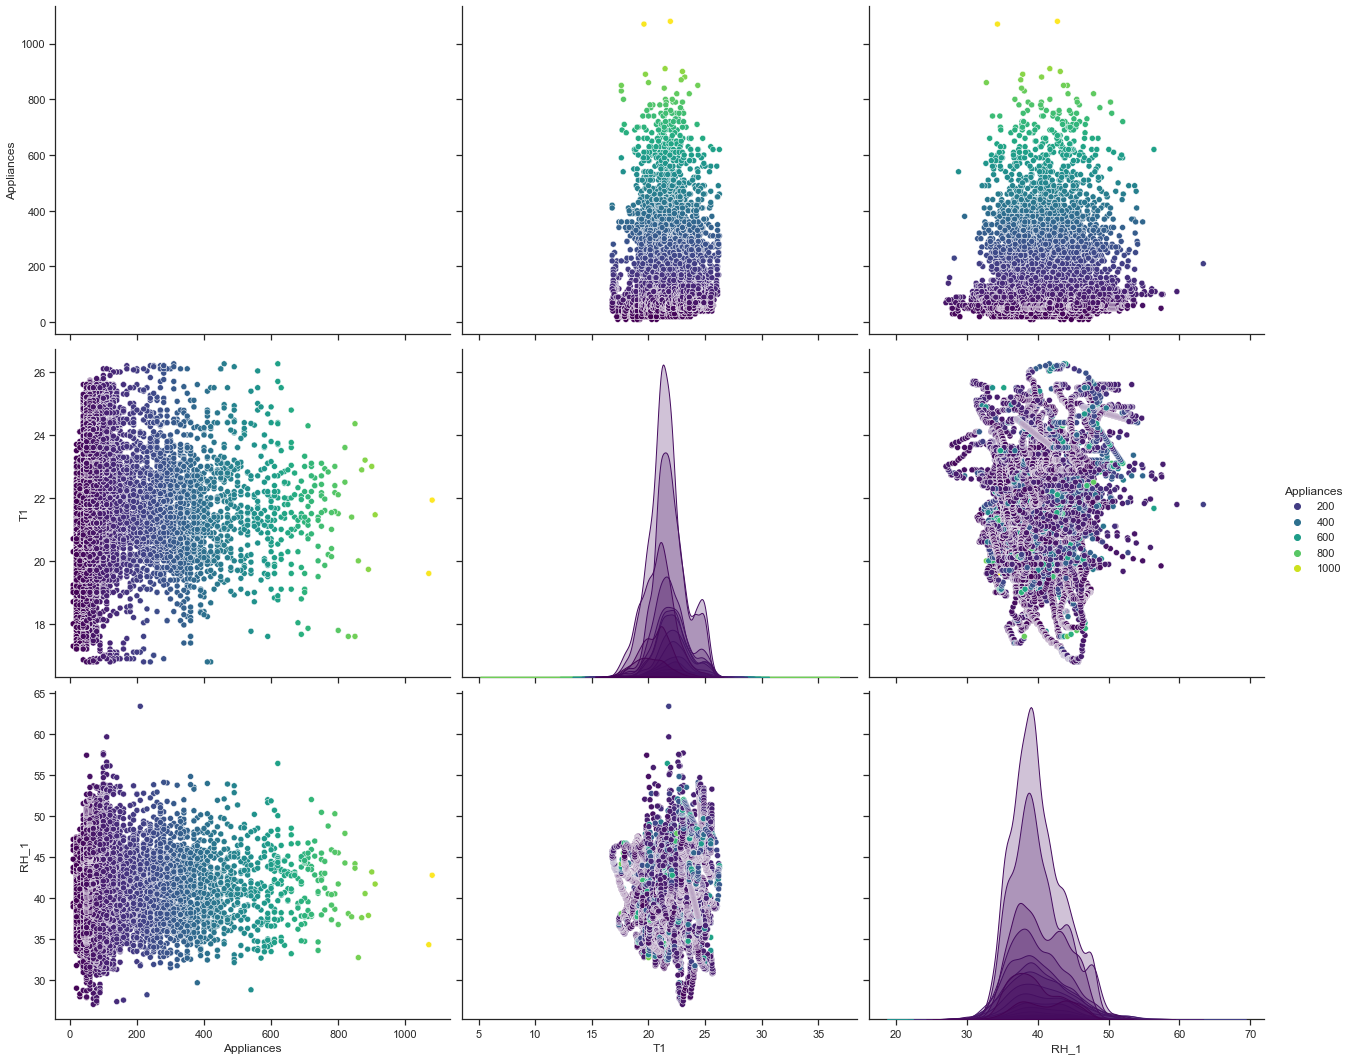

In [30]:
sns.set(style="ticks")

sns.pairplot(data=energy_data, hue='Appliances', vars=['Appliances','T1','RH_1'], palette='viridis', height=5, aspect=1.2)
plt.show()


## Correlation Matrices

In [31]:
# select specific columns from the energy_data dataframe
selected_columns1 = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out']

# create a new dataframe with only the selected columns
selected_data1 = energy_data[selected_columns1]

# calculate the correlation matrix for the selected columns only
corr_matrix1 = selected_data1.corr()

corr_matrix1


Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances    1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights        0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1            0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1          0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2            0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2         -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3            0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3          0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4            0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4          0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5            0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5          0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6            0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6         -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7            0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7         -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8            0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8         -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9            0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9         -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out         0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
RH_out       -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   

                  T3      RH_3        T4      RH_4  ...        T6      RH_6  \
Appliances  0.085060  0.036292  0.040281  0.016965  ...  0.117638 -0.083178   
lights     -0.097393  0.131161 -0.008859  0.114936  ... -0.079029  0.153756   
T1          0.892402 -0.028550  0.877001  0.097861  ...  0.654769 -0.615045   
RH_1        0.253230  0.844677  0.106180  0.880359  ...  0.316141  0.245126   
T2          0.735245  0.121497  0.762066  0.231563  ...  0.801186 -0.580372   
RH_2        0.137319  0.678326 -0.047304  0.721435  ... -0.009670  0.389933   
T3          1.000000 -0.011234  0.852778  0.122737  ...  0.686882 -0.647672   
RH_3       -0.011234  1.000000 -0.140457  0.898978  ...  0.076833  0.514912   
T4          0.852778 -0.140457  1.000000 -0.048650  ...  0.652350 -0.703149   
RH_4        0.122737  0.898978 -0.048650  1.000000  ...  0.259047  0.392178   
T5          0.888169 -0.050062  0.871813  0.091812  ...  0.629161 -0.632384   
RH_5       -0.066355  0.375422 -0.076489  0.352591  ... -0.078337  0.263797   
T6          0.686882  0.076833  0.652350  0.259047  ...  1.000000 -0.672137   
RH_6       -0.647672  0.514912 -0.703149  0.392178  ... -0.672137  1.000000   
T7          0.847374 -0.250090  0.877763 -0.131204  ...  0.619085 -0.753973   
RH_7        0.172624  0.832685  0.043527  0.894301  ...  0.256077  0.357222   
T8          0.795283 -0.283228  0.796256 -0.167066  ...  0.482836 -0.665869   
RH_8        0.044427  0.828822 -0.095192  0.847259  ...  0.073721  0.489580   
T9          0.901324 -0.195270  0.889439 -0.044518  ...  0.667177 -0.738940   
RH_9        0.134602  0.833538 -0.025549  0.856591  ...  0.184424  0.391943   
T_out       0.699417  0.118207  0.663478  0.293289  ...  0.974787 -0.641572   
RH_out     -0.281718  0.356192 -0.388602  0.336813  ... -0.569119  0.718587   

                  T7      RH_7        T8      RH_8        T9      RH_9  \
Appliances  0.025801 -0.055642  0.039572 -0.094039  0.010010 -0.051462   
lights     -0.135347  0.035069 -0.071458  0.012915 -0.157592 -0.008766   
T1          0.838705  0.135182  0.825413 -0.006441  0.844777  0.071756   
RH_1        0.021397  0.801122 -0.030053  0.736196  0.115263  0.764001   
T2          0.663660  0.229212  0.578191  0.068534  0.675535  0.157346   
R

In [32]:
#Numerically
corr_matrix=energy_data.corr(numeric_only=True)
corr_matrix

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4  ...        T9      RH_9  \
Appliances   0.085060  0.036292  0.040281  0.016965  ...  0.010010 -0.051462   
lights      -0.097393  0.131161 -0.008859  0.114936  ... -0.157592 -0.008766   
T1           0.892402 -0.028550  0.877001  0.097861  ...  0.844777  0.071756   
RH_1         0.253230  0.844677  0.106180  0.880359  ...  0.115263  0.764001   
T2           0.735245  0.121497  0.762066  0.231563  ...  0.675535  0.157346   
RH_2         0.137319  0.678326 -0.047304  0.721435  ...  0.054544  0.676467   
T3           1.000000 -0.011234  0.852778  0.122737  ...  0.901324  0.134602   
RH_3        -0.011234  1.000000 -0.140457  0.898978  ... -0.195270  0.833538   
T4           0.852778 -0.140457  1.000000 -0.048650  ...  0.889439 -0.025549   
RH_4         0.122737  0.898978 -0.048650  1.000000  ... -0.044518  0.856591   
T5           0.888169 -0.050062  0.871813  0.091812  ...  0.911055  0.072308   
RH_5        -0.066355  0.375422 -0.076489  0.352591  ... -0.138509  0.272197   
T6           0.686882  0.076833  0.652350  0.259047  ...  0.667177  0.184424   
RH_6        -0.647672  0.514912 -0.703149  0.392178  ... -0.738940  0.391943   
T7           0.847374 -0.250090  0.877763 -0.131204  ...  0.944776 -0.077690   
RH_7         0.172624  0.832685  0.043527  0.894301  ...  0.028055  0.858686   
T8           0.795283 -0.283228  0.796256 -0.167066  ...  0.869338 -0.156820   
RH_8         0.044427  0.828822 -0.095192  0.847259  ... -0.113014  0.855812   
T9           0.901324 -0.195270  0.889439 -0.044518  ...  1.000000 -0.008683   
RH_9         0.134602  0.833538 -0.025549  0.856591  ... -0.008683  1.000000   
T_out        0.699417  0.118207  0.663478  0.293289  ...  0.668220  0.223270   
Press_mm_hg -0.1899

The correlation matrix with all the features was difficult to interpret so I decided to create two correlation matrices.

The first correlation matrix is between the Appliances and Lights features with the temperatures and humidity features.

The second correlation matrix is between the Appliances and Lights features with these features T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, and rv2.

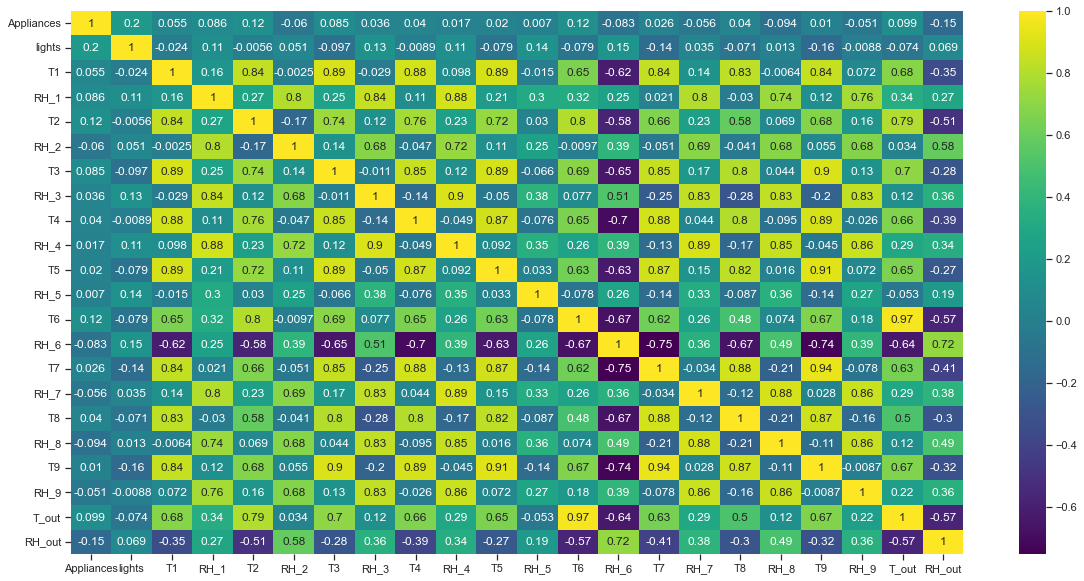

In [33]:
#graphically
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix1,annot=True, cmap='viridis')
plt.show()

In [34]:
selected_columns2 = ['Appliances', 'lights', 'Press_mm_hg', 'RH_out', 'T_out','Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2']# create a new dataframe with only the selected columns

selected_data2 = energy_data[selected_columns2]

# calculate the correlation matrix for the selected columns only
corr_matrix2 = selected_data2.corr()

corr_matrix2

Appliances    lights  Press_mm_hg    RH_out     T_out  Windspeed  \
Appliances     1.000000  0.197278    -0.034885 -0.152282  0.099155   0.087122   
lights         0.197278  1.000000    -0.010576  0.068543 -0.074424   0.060281   
Press_mm_hg   -0.034885 -0.010576     1.000000 -0.092017 -0.143249  -0.235032   
RH_out        -0.152282  0.068543    -0.092017  1.000000 -0.574197  -0.176458   
T_out          0.099155 -0.074424    -0.143249 -0.574197  1.000000   0.192936   
Windspeed      0.087122  0.060281    -0.235032 -0.176458  0.192936   1.000000   
Visibility     0.000230  0.020038     0.040315  0.083125 -0.077367  -0.007516   
Tdewpoint      0.015353 -0.036322    -0.244098  0.036506  0.790661   0.125972   
rv1           -0.011145  0.000521     0.000699  0.020441 -0.015216  -0.011342   
rv2           -0.011145  0.000521     0.000699  0.020441 -0.015216  -0.011342   

             Visibility  Tdewpoint       rv1       rv2  
Appliances     0.000230   0.015353 -0.011145 -0.011145  
lights         0.020038  -0.036322  0.000521  0.000521  
Press_mm_hg    0.040315  -0.244098  0.000699  0.000699  
RH_out         0.083125   0.036506  0.020441  0.020441  
T_out         -0.077367   0.790661 -0.015216 -0.015216  
Windspeed     -0.007516   0.125972 -0.011342 -0.011342  
Visibility     1.000000  -0.042190 -0.005889 -0.005889  
Tdewpoint     -0.042190   1.000000 -0.003943 -0.003943  
rv1           -0.005889  -0.003943  1.000000  1.000000  
rv2           -0.005889  -0.003943  1.000000  1.000000

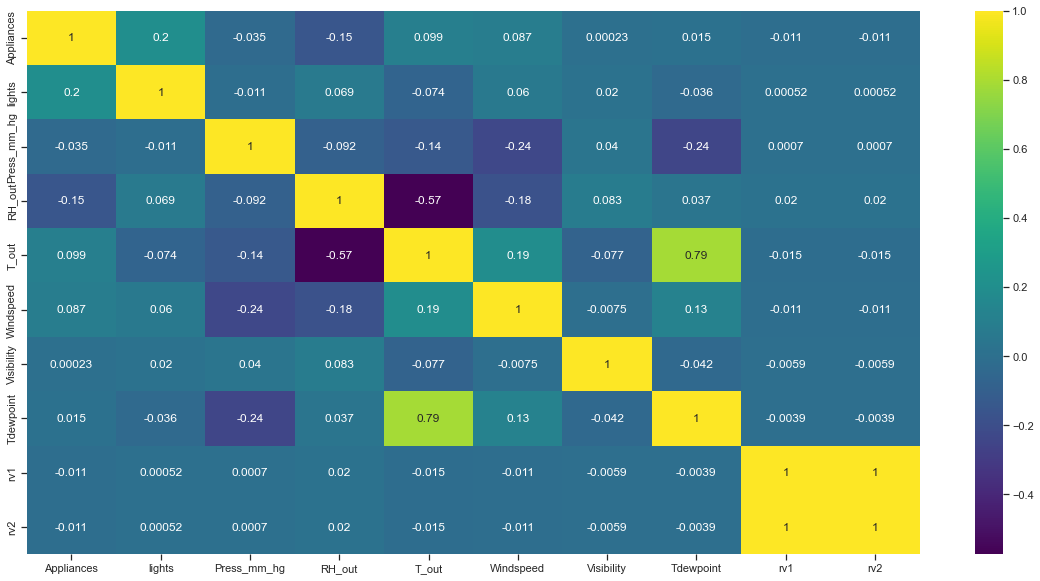

In [35]:
#graphically
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix2,annot=True, cmap='viridis')
plt.show()

In [36]:
energy_data

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00        60.0    30.0  19.890000  47.596667   
1     2016-01-11 17:10:00        60.0    30.0  19.890000  46.693333   
2     2016-01-11 17:20:00        50.0    30.0  19.890000  46.300000   
3     2016-01-11 17:30:00        50.0    40.0  19.890000  46.066667   
4     2016-01-11 17:40:00        60.0    40.0  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00       100.0     0.0  25.566667  46.560000   
19731 2016-05-27 17:30:00        90.0     0.0  25.500000  46.500000   
19732 2016-05-27 17:40:00       270.0    10.0  25.500000  46.596667   
19733 2016-05-27 17:50:00       420.0    10.0  25.500000  46.990000   
19734 2016-05-27 18:00:00       430.0    10.0  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [37]:
# plt.plot (energy_data['date'], energy_data['Appliances'])

# Regression Model Selection

### Work done
Before building the regression models, I preprocessed the data by scaling it using MinMaxScaler and splitting
it into training and testing sets at a 70:30 ratio. I opted for MinMaxScaler over StandardScaler because the
feature selection algorithm I used requires non-negative values. MinMaxScaler rescales the data to a fixed
range between 0 and 1. I built three linear regression models with different sets of features. The first model
included all available features except Appliances, lights, and date as independent variables, and Appliances as
the dependent variable. The second model was constructed using features obtained from the principal
component analysis. I retained 10 principal components that explained 95% of the variance in the data. The third model utilized features selected from the SelectKBest feature selection library.
By comparing the performance of these models, I was able to identify which set of features provided the best
fit to the data and which model had the highest predictive power.
### Results
Out of the three models evaluated, the Linear Regression model demonstrated the best performance, as
illustrated in "Comparison of Model RMSE" and "Comparison of Model R2" plots. This model achieved the lowest RMSE score of 93.64 and the highest R2 score
of 0.1489. The SelectKBest algorithm with a k value of 10 identified the following features as being most
influential in predicting energy consumption by the appliances: T1, T2, T3, T4, T5, T6, RH_6, T7, T8, and T9.
It is noteworthy that all of these features, except for RH_6, are temperature-related, indicating that temperature
values can effectively predict energy consumption by the appliances according to the SelectKBest algorithm.

# Data Preprocessing

In [38]:
X = energy_data.drop(['Appliances', 'lights', 'date'], axis=1)
# target variable is Appliances
y = energy_data['Appliances']

## Scaling the Data

In [39]:
# Assume X is your input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


I used MinMaxScaler instead of StandardScaler because I wanted non negative values. MinMaxScaler scales the data to a 
fixed range between 0 and 1

## Splitting the Data

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (13814, 26) (13814,)
Testing set shape: (5921, 26) (5921,)


# Model Building

## Linear Regression Model

In [41]:
# Create a linear regression object
model = LinearRegression()

# Fit the model using the sample data
model.fit(X_train, y_train)

# Predict a new value
y_predict = model.predict(X_test)

# Performance metrics
rmse1 = mean_squared_error(y_test, y_predict, squared=False)
print (f"rmse: {rmse1}")

r21 = r2_score(y_test, y_predict)
print (f"r2: {r21}")

rmse: 93.6404609399803
r2: 0.14890246319303524


## Linear Regression Model after PCA

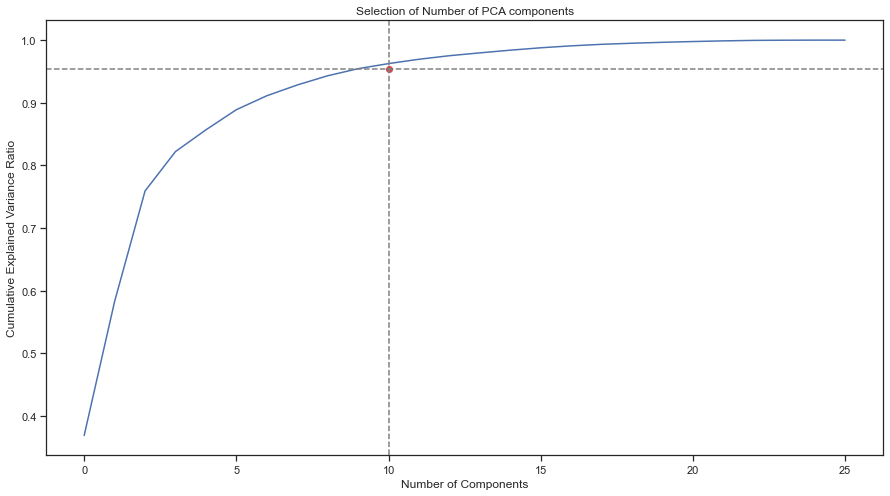

In [42]:
# Apply PCA to the data
pca = PCA()
pca.fit(X_scaled)

# Get the explained variance ratio for each component
explained_variances = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variances = np.cumsum(explained_variances)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(15, 8)) 
plt.plot(cumulative_variances)
plt.scatter(10, cumulative_variances[9], color='r')
plt.axvline(x=10, color='gray', linestyle='--')
plt.axhline(y=cumulative_variances[9], color='gray', linestyle='--')
plt.title ('Selection of Number of PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


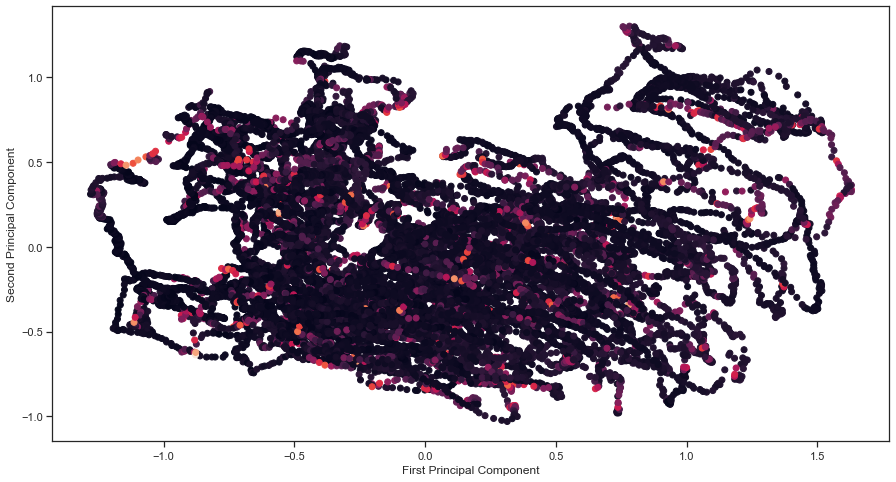

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA results
plt.figure(figsize=(15, 8)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [44]:
# Apply PCA with two components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


In [45]:
# Get explained variance ratio
explained_variances = pca.explained_variance_ratio_

# Print explained variances
print("Explained variances:", explained_variances)

Explained variances: [0.36899475 0.21383105 0.17638188 0.06293319 0.03469444 0.03214908
 0.02222404 0.01720728 0.01471214 0.01133692]


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Fit the model using the sample data
model.fit(X_train, y_train)

# Predict a new value
y_predict = model.predict(X_test)

# Performance metrics
rmse2 = mean_squared_error(y_test, y_predict, squared=False)
print (f"rmse after PCA: {rmse2}")

r22 = r2_score(y_test, y_predict)
print (f"r2 after PCA: {r22}")

rmse after PCA: 99.56226975547618
r2 after PCA: 0.037852123718348674


## Linear Regression Model after Feature Selection 

Note: Feature selection was done using SelectKBest and chi2

In [47]:
# feature selection using SelectKBest and chi2
# Apply feature selection using chi-squared test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Print the indices of the selected features
print(selector.get_support(indices=True))

# Get the column names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the column names of the selected features
print(selected_feature_names)

[ 0  2  4  6  8 10 11 12 14 16]
Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'RH_6', 'T7', 'T8', 'T9'], dtype='object')


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Fit the model using the sample data
model.fit(X_train, y_train)

# Predict a new value
y_predict = model.predict(X_test)

# Performance metrics
rmse3 = mean_squared_error(y_test, y_predict, squared=False)
print (f"rmse after Feature Selection: {rmse3}")

r23 = r2_score(y_test, y_predict)
print (f"r2 after Feature Selection: {r23}")

rmse after Feature Selection: 97.83722960302566
r2 after Feature Selection: 0.07090410537997505


## Model Comparison

In [49]:
#Retrieve rmse and r2 scores
rmse={"Linear Regression Model":rmse1, "Linear Regression Model after PCA" :rmse2, " Linear Regression Model after Feature Selection":rmse3}
r2={"Linear Regression Model":r21, "Linear Regression Model after PCA":r22, "Linear Regression Model after Feature Selection":r23}

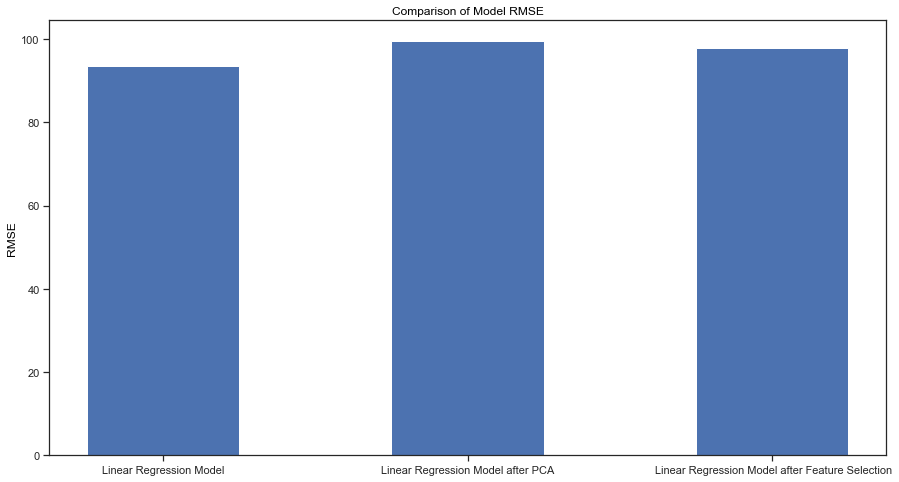

In [50]:
# Plot the graph of rmse
models=list(rmse.keys())
model_rmse =list(rmse.values())

plt.figure(figsize=(15, 8)) 
plt.bar(models, model_rmse, width = 0.5)
# plt.xlabel("Regression Model", color='black')
plt.ylabel("RMSE", color='black')
plt.title("Comparison of Model RMSE", color='black')
plt.show()

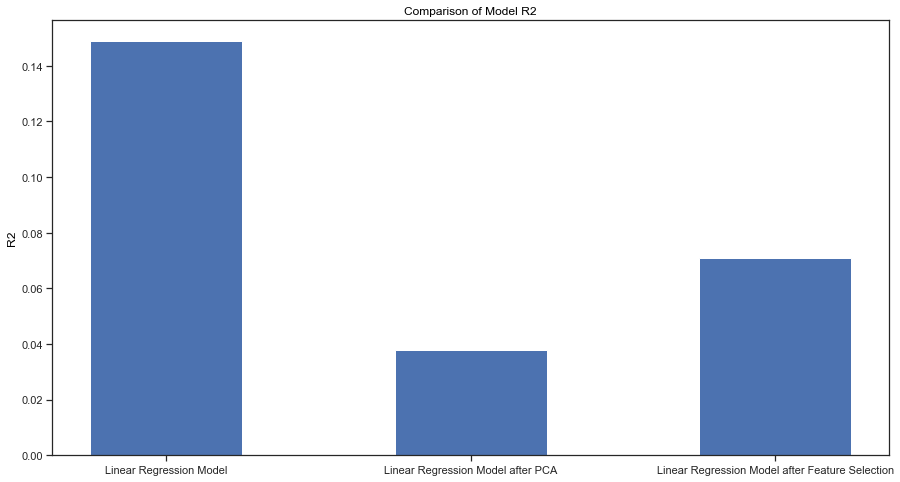

In [51]:
# Plot the graph of rmse
models=list(r2.keys())
model_r2 =list(r2.values())

plt.figure(figsize=(15, 8)) 
plt.bar(models, model_r2, width = 0.5)
# plt.xlabel("Regression Model", color='black')
plt.ylabel("R2", color='black')
plt.title("Comparison of Model R2", color='black')
plt.show()

Test to see whether linear regression model improves with of rv1 and rv2 features since they were just added to test the 
regression models.

In [52]:
X = energy_data.drop(['Appliances', 'lights', 'date', 'rv1', 'rv2'], axis=1)
y = energy_data['Appliances']

# Assume X is your input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Fit the model using the sample data
model.fit(X_train, y_train)

# Predict a new value
y_predict = model.predict(X_test)

# Performance metrics
rmse1 = mean_squared_error(y_test, y_predict, squared=False)
print (f"rmse: {rmse1}")

r21 = r2_score(y_test, y_predict)
print (f"r2: {r21}")

rmse: 93.62377662403316
r2: 0.14920572345100935
